In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.formula.api import ols
from scipy import stats
from itertools import product
from pathlib import Path
import warnings
from astsadata import *
import arch
from arch import arch_model

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5]

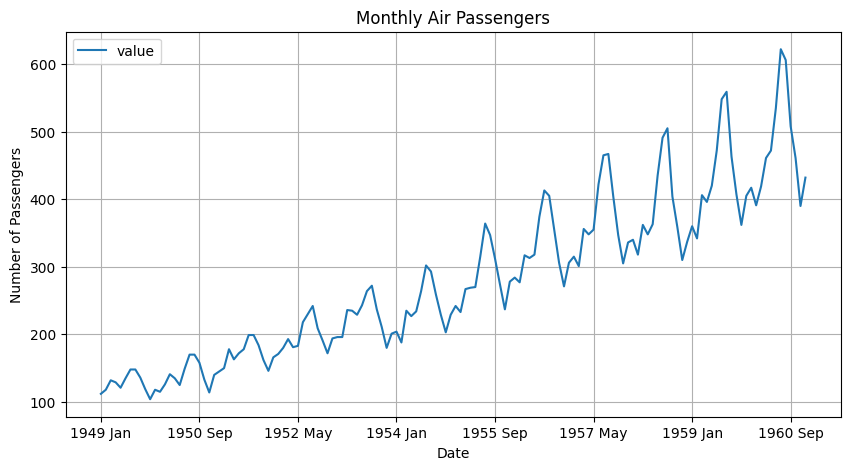

In [7]:
# Leer el archivo CSV
df = pd.read_csv("/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/data/raw/AirPassengers.csv")
import pandas as pd

# Definir la columna 'Month' como índice
df.set_index('index', inplace=True)

# Renombrar columna si es necesario
df.columns = ['value']

# Graficar
df.plot(y='value', figsize=(10, 5), title='Monthly Air Passengers')
plt.ylabel("Number of Passengers")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def check_stationarity(series, alpha=0.05, verbose=True):
    """
    Realiza el test de Dickey-Fuller aumentado sobre una serie temporal.
    Retorna True si es estacionaria, False si no.
    """
    result = adfuller(series.dropna())
    p_value = result[1]

    if verbose:
        print("ADF Statistic:", result[0])
        print("p-value:", p_value)
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value}')
        print("=>", "Estacionaria ✅" if p_value < alpha else "No estacionaria ❌")

    return p_value < alpha


def difference_until_stationary(series, max_diff=3, alpha=0.05):
    """
    Aplica diferenciaciones sucesivas hasta que la serie sea estacionaria
    o se alcance max_diff.
    Retorna la serie transformada y el número de diferenciaciones aplicadas.
    """
    current_series = series.copy()
    d = 0

    while d < max_diff:
        if check_stationarity(current_series, alpha=alpha, verbose=False):
            print(f"La serie es estacionaria con d = {d} ✅")
            return current_series.dropna(), d
        else:
            current_series = current_series.diff()
            d += 1

    print(f"No se logró estacionaridad tras {max_diff} diferenciaciones ❌")
    return current_series.dropna(), d

ADF Statistic: 0.815368879206053
p-value: 0.9918802434376411
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598
=> No estacionaria ❌
La serie es estacionaria con d = 2 ✅


<Axes: title={'center': 'Serie Estacionaria tras d=2 diferenciaciones'}, xlabel='index'>

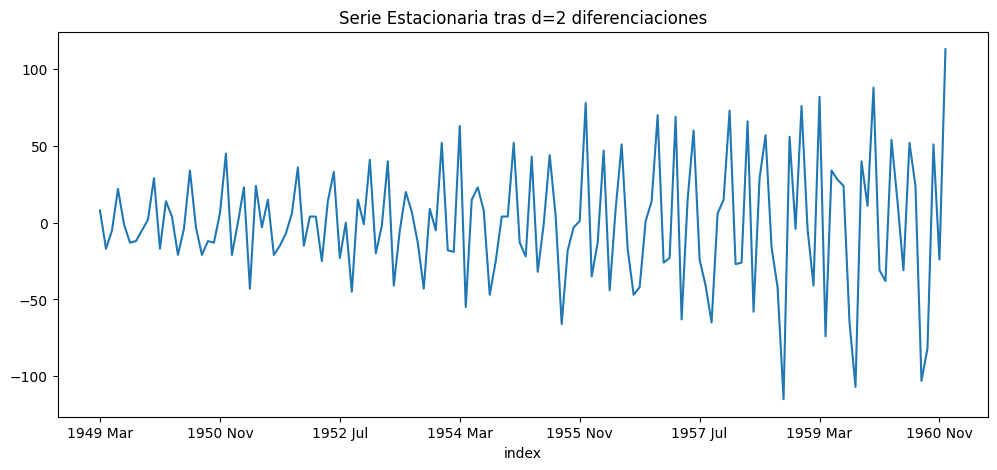

In [9]:
# Paso 1: Verificar si es estacionaria
check_stationarity(df['value'])

# Paso 2: Diferenciar hasta lograr estacionaridad
serie_estacionaria, d = difference_until_stationary(df['value'])

# Graficar resultado
serie_estacionaria.plot(title=f"Serie Estacionaria tras d={d} diferenciaciones")

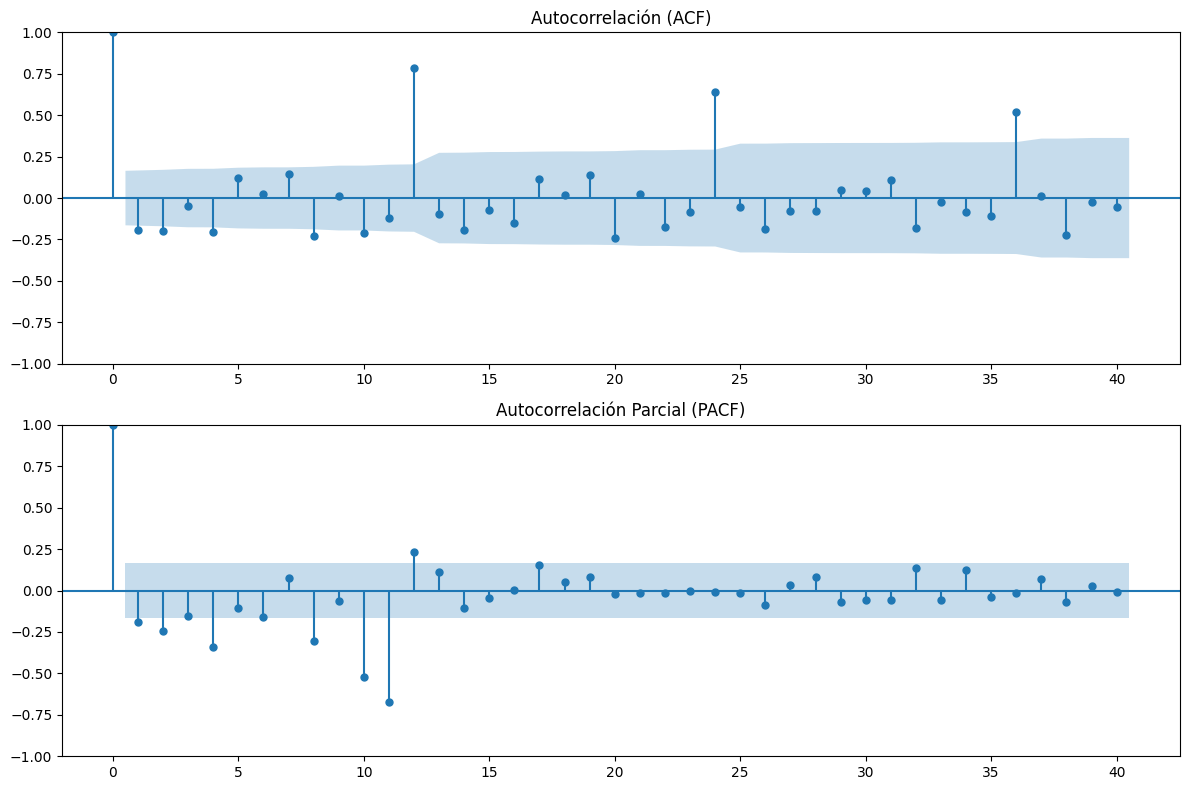

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# serie_estacionaria, d = difference_until_stationary(df['value'])

# Gráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(serie_estacionaria, ax=ax[0], lags=40)
ax[0].set_title("Autocorrelación (ACF)")

plot_pacf(serie_estacionaria, ax=ax[1], lags=40, method='ywm')  # método robusto para PACF
ax[1].set_title("Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()